In [2]:
import pandas as pd
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
df = pd.read_csv('/Users/alex/Downloads/DS4300_data_2010.csv', usecols=['cusip', 'datadate', 'prccd', 'exchg', 'cshoc', 'cshtrd'])

FileNotFoundError: [Errno 2] No such file or directory: '/Users/alex/Downloads/DS4300_data_2010.csv'

In [8]:
df['date'] = pd.to_datetime(df['datadate'], format='%Y%m%d')
df

datadate      cusip       cshoc    cshtrd  prccd  exchg       date
0         20100104  000354100   2683000.0       0.0   0.02   19.0 2010-01-04
1         20100105  000354100   2683000.0       0.0   0.02   19.0 2010-01-05
2         20100106  000354100   2683000.0       0.0   0.02   19.0 2010-01-06
3         20100107  000354100   2683000.0       0.0   0.02   19.0 2010-01-07
4         20100108  000354100   2683000.0       0.0   0.02   19.0 2010-01-08
...            ...        ...         ...       ...    ...    ...        ...
51242292  20210405  Y4600W108  21383000.0  187557.0  33.70   14.0 2021-04-05
51242293  20210406  Y4600W108  21383000.0  152742.0  35.26   14.0 2021-04-06
51242294  20210407  Y4600W108  21383000.0  125115.0  36.39   14.0 2021-04-07
51242295  20210408  Y4600W108  21383000.0   38958.0  35.50   14.0 2021-04-08
51242296  20210409  Y4600W108  21383000.0   71243.0  30.87   14.0 2021-04-09

[51242297 rows x 7 columns]

In [43]:
close = df.drop_duplicates(subset=['date', 'cusip']).set_index(['date', 'cusip'])['prccd'].unstack().dropna(thresh=16000).stack()

In [44]:
close = close.rename('close')

In [119]:
count = close.dropna().groupby('date').count()

In [116]:
close = close[close != 0]
pct_change = close.unstack().pct_change(1).stack()

pct_change = pct_change[(pct_change > -.15) & (pct_change < .15)]

#pct_change = pd.Series(winsorize(pct_change.values, limits=[.01, .01]))

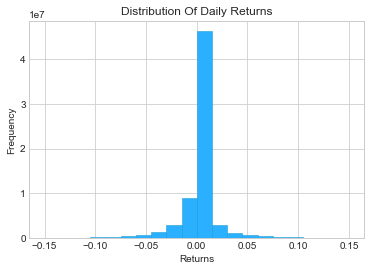

In [118]:
plt.hist(pct_change, bins=20, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.title('Distribution Of Daily Returns')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.savefig('returns_dist.png')
plt.show()

In [47]:
df['mc'] = df['prccd'] * df['cshoc']
mc = df.drop_duplicates(subset=['date', 'cusip']).set_index(['date', 'cusip'])['mc'].unstack().dropna(thresh=16000).stack()

<AxesSubplot:xlabel='date'>

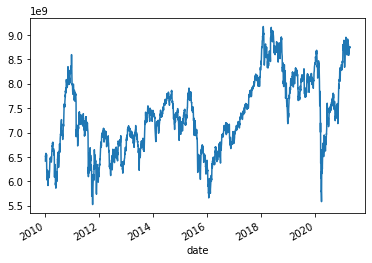

In [50]:
mc.groupby('date').mean().plot()

In [122]:
import seaborn as sns
sns.lineplot(data=count, x="date", y="close").set_title("Average Market Cap Aggregated by Day")

ValueError: Could not interpret value `close` for parameter `y`

In [121]:
count

date
2010-01-04    17688
2010-01-05    17696
2010-01-06    17705
2010-01-07    17676
2010-01-08    17691
              ...  
2021-04-05    18142
2021-04-06    18157
2021-04-07    18173
2021-04-08    18175
2021-04-09    18171
Name: close, Length: 2779, dtype: int64

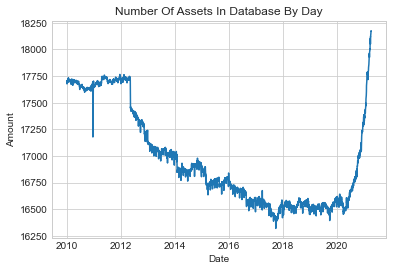

In [130]:
plt.plot(count)
plt.title('Number Of Assets In Database By Day')
plt.ylabel('Amount')
plt.xlabel('Date')
plt.savefig('universe_quantity.png')
plt.show()

In [125]:
avg_mc = mc.groupby('date').mean()

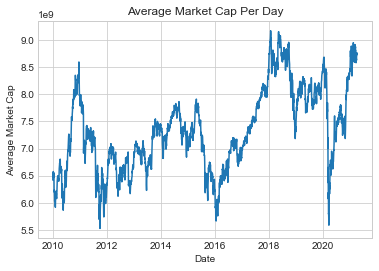

In [128]:
plt.plot(avg_mc)
plt.title('Average Market Cap Per Day')
plt.ylabel('Average Market Cap')
plt.xlabel('Date')
plt.savefig('avg_mc.png')
plt.show()

In [9]:

df['dollar_volume'] = df['prccd'] * df['cshoc']
dv = df.drop_duplicates(subset=['date', 'cusip']).set_index(['date', 'cusip'])['dollar_volume'].unstack().dropna(thresh=16000).stack()

In [11]:
val_day = dv.groupby('date').sum()

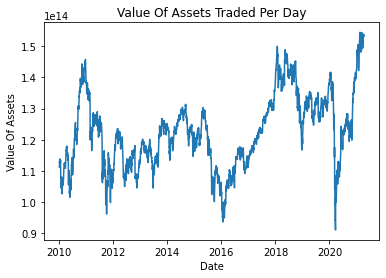

In [13]:
plt.plot(val_day)
plt.title('Value Of Assets Traded Per Day')
plt.ylabel('Value Of Assets')
plt.xlabel('Date')
plt.savefig('dollar_volume.png')
plt.show()